In [46]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os

In [76]:
if not os.path.exists('data'):
    os.makedirs('data')

for i in range(10, 35):
    if (os.path.exists("data/red_ball_coordinates_60px_0" + str(i) + ".csv")):
        ip = pd.read_csv("data/red_ball_coordinates_60px_0" + str(i) + ".csv", delimiter=",", decimal=".", header=0)
        ip.to_csv('data/red_ball_coordinates_60px_full.csv', mode='a', index=False, header=False)
        op = pd.read_csv("data/positions_xyz_60px_0" + str(i) + ".csv", delimiter=",", decimal=".", header=0)
        op.to_csv('data/positions_xyz_60px_full.csv', mode='a', index=False, header=False)

In [77]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('data/positions_xyz_60px_full.csv')
dataCoordinates = pd.read_csv('data/red_ball_coordinates_60px_full.csv')

# X zijn de 14 inputs, en y zijn de 3 outputs
X = dataPositions.values
y = dataCoordinates.values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9347, 3)
Shape of y: (9347, 14)


In [79]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
dfX = imputer.fit_transform(X)
dfy = imputer.fit_transform(y)
display(dfy)


array([[ 1.71428571, 35.42857143, 41.35      , ..., 45.4       ,
        49.        , 60.        ],
       [ 1.71428571, 35.42857143, 41.35      , ..., 45.4       ,
        49.        , 60.        ],
       [ 1.71428571, 35.42857143, 41.75      , ..., 45.4       ,
        49.        , 60.        ],
       ...,
       [ 0.25      , 10.        , 39.33333333, ..., 45.91666667,
        46.875     , 55.25      ],
       [ 0.25      , 10.        , 39.64285714, ..., 45.91666667,
        47.125     , 55.875     ],
       [ 0.        , 10.        , 39.82352941, ..., 45.91666667,
        47.64285714, 57.        ]])

In [80]:
# Split de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

# Standaardiseer de data (belangrijk voor neurale netwerken)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creëer het neurale netwerk model
model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=10000, random_state=42)

# Train het model
model.fit(X_train_scaled, y_train)

# Voorspel op de testset
y_pred = model.predict(X_test_scaled)

# Bereken de Mean Squared Error (MSE) als evaluatiemaatstaf
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 4.0318182737964925


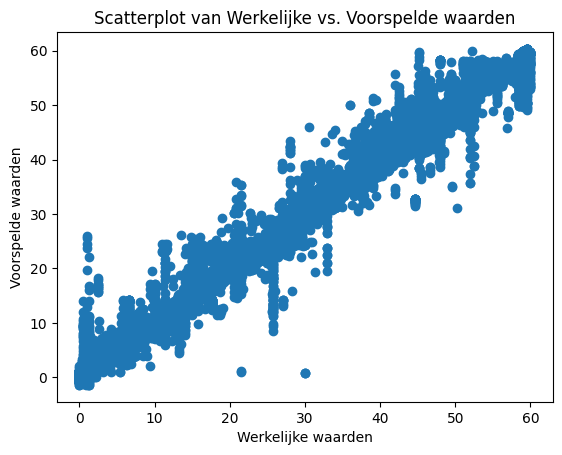

In [81]:
import matplotlib.pyplot as plt

# Plot de voorspelde waarden versus de werkelijke waarden
plt.scatter(y_test, y_pred)
plt.xlabel("Werkelijke waarden")
plt.ylabel("Voorspelde waarden")
plt.title("Scatterplot van Werkelijke vs. Voorspelde waarden")
plt.show()